## TTim Exercise 2

In [1]:
from ttim import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Consider a three-aquifer system. Aquifer properties are given in Table 2. The top aquifer has phreatic storage while the others have elastic storage. A well is located at $(x,y)=(0,0)$ and is screened in layer 1. The well starts pumping at time $t=0$ with a discharge $Q=1000$ m$^3$/d. The radius of the well is 0.2 m.

#### Table 2 - Aquifer properties for exercise 2.
|               | $k$ (m/d) | $c$ (d) |  $S$  | $S_s$ | $z_t$ (m) | $z_b$ (m)|
|---------------| ---------:| -------:| -----:| -----:| ---------:| --------:|
|Aquifer 0      |      1    |         |   0.1 |       |   25      |        20|
|Leaky layer 1  |           |  1000   |       |0      |   20      |        18|
|Aquifer 1      |     20    |         |       |0.0001 |   18      |        10|
|Leaky layer 2  |           |  2000   |       |0      |   10      |         8|
|Aquifer 2      |      2    |         |       |0.0001 |    8      |         0|

#### Exercise 2a
Compute the head as a function of time at $(x,y)=(50,0)$. Make a plot of the head vs. time from $t=0.1$ till $t=1000$ days using a linear scaling on both axes. Make a second graph using a logarithmic scale for the time axis. At what time does the delayed response of the water table kick in?

self.Neq  1
solution complete


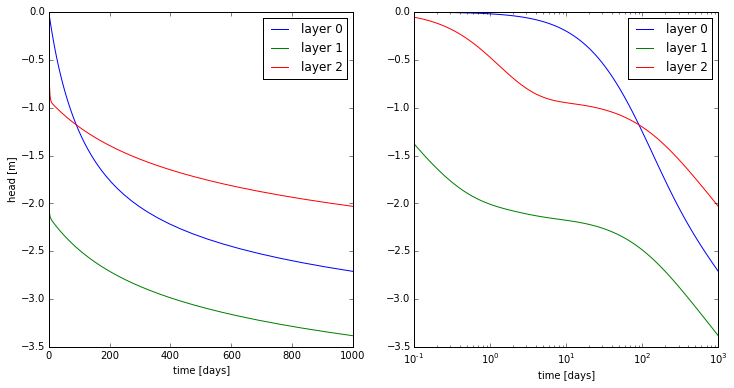

In [14]:
ml = ModelMaq(kaq=[1, 20, 2],
              z=[25, 20, 18, 10, 8, 0],
              c=[1000, 2000],
              Saq=[0.1, 1e-4, 1e-4],
              Sll=[0, 0],
              phreatictop=True,
              tmin=0.001,
              tmax=1000,
              M=20)
w = Well(ml, xw=0, yw=0, rw=0.2, tsandQ=[(0,1000)], layers=1)
ml.solve()

t = np.logspace(-1, 3, 100)
h = ml.head(50, 0, t)
plt.figure(figsize = (12,6))
plt.subplot(121)
plt.plot(t, h[0], label='layer 0')
plt.plot(t, h[1], label='layer 1')
plt.plot(t, h[2], label='layer 2')
plt.legend(loc='best')
plt.ylabel('head [m]')
plt.xlabel('time [days]')
plt.subplot(122)
plt.semilogx(t, h[0], label='layer 0')
plt.semilogx(t, h[1], label='layer 1')
plt.semilogx(t, h[2], label='layer 2')
plt.legend(loc = 'best')
plt.xlabel('time [days]');

#### Exercise 2b
Create a plot of the head vs. the distance from the well after 10 days of  pumping. Plot the head in all three layers up to a distance of 1000 m from the well. Determine at what distance from the well the head in layer 2 is lower than in layer 1. Make the same plot after 1000 days of pumping.

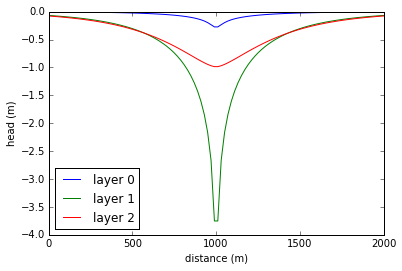

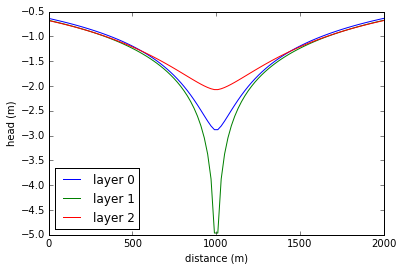

In [3]:
xsection(ml, 
         x1=-1000, x2=1000, 
         y1=0, y2=0, 
         N=100,
         t=10,
         layers=[0,1,2]) 
plt.legend(['layer 0','layer 1','layer 2'], loc='best')
plt.xlabel('distance (m)')
plt.ylabel('head (m)')
xsection(ml, 
         x1=-1000, x2=1000, 
         y1=0, y2=0, 
         N=100,
         t=1000,
         layers=[0, 1, 2]) 
plt.legend(['layer 0','layer 1','layer 2'], loc = 'best')
plt.xlabel('distance (m)')
plt.ylabel('head (m)');

#### Exercise 2c
The well is turned off after 100 days. Compute the head as a function of time at $(x,y)=(50,0)$. Make a plot of the head vs. time from $t=0.1$ till $t=1000$ days using a linear scaling on both axes. Make a second graph using a logarithmic scale for the time axis.

self.Neq  1
solution complete


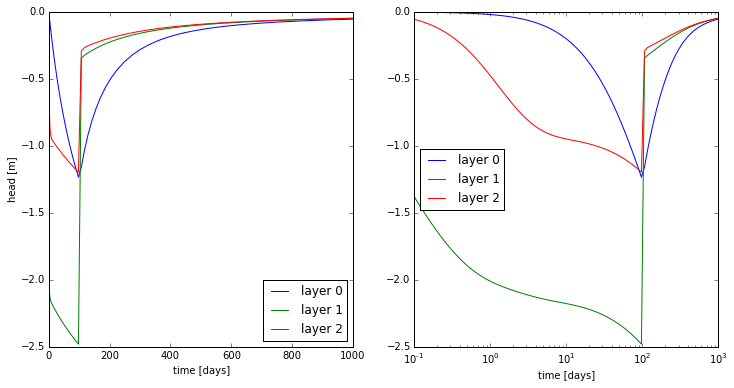

In [4]:
ml.removeElement(w)

w = Well(ml, xw = 0, yw = 0, rw = 0.2, tsandQ = [(0,1000), (100,0)], layers = 1)

ml.solve()

t = np.logspace(-1, 3, 100)
h = ml.head(50, 0, t)
plt.figure(figsize = (12,6))
plt.subplot(121)
plt.plot(t, h[0], label = 'layer 0')
plt.plot(t, h[1], label = 'layer 1')
plt.plot(t, h[2], label = 'layer 2')
plt.legend(loc = 'best')
plt.ylabel('head [m]')
plt.xlabel('time [days]')
plt.subplot(122)
plt.semilogx(t, h[0], label = 'layer 0')
plt.semilogx(t, h[1], label = 'layer 1')
plt.semilogx(t, h[2], label = 'layer 2')
plt.legend(loc = 'best')
plt.xlabel('time [days]');

Close-up right after turning the well off

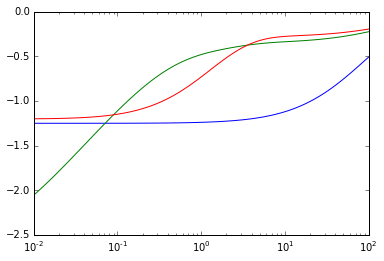

In [5]:
t2 = 100 + np.logspace(-2,2,100)
h = ml.head(50, 0, t2)
plt.semilogx(t2 - 100, h[0])
plt.semilogx(t2 - 100, h[1])
plt.semilogx(t2 - 100, h[2])

#### Exercise 2d
Change the well to a well that is screened in layers 1 and 2 with a total discharge of $Q=1000$ m$^3$/d. Solve the model. Create a plot of the head vs. distance from the well after 10 days of pumping.

self.Neq  2
solution complete


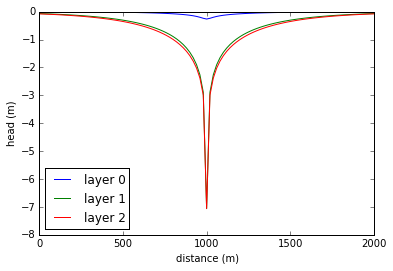

In [6]:
ml.removeElement(w)
w = Well(ml, xw=0, yw=0, rw=0.2, tsandQ=[(0, 1000)], layers=[1, 2])
ml.solve()
xsection(ml, 
         x1=-1000, x2=1000, 
         y1=0, y2=0, 
         N=101,
         t=10,
         layers=[0, 1, 2]) 
plt.legend(['layer 0', 'layer 1', 'layer 2'], loc='best')
plt.xlabel('distance (m)')
plt.ylabel('head (m)');

#### Exercise 2e
Check that the heads at the well screen are the same in both layers 1 and 2.

In [8]:
h = w.headinside(t = 10)
print 'the head in layer 1 is:', h[0]  # Screened layer 0
print 'the head in layer 2 is:', h[1]  # Screened layer 1

 the head in layer 1 is: [-7.06102366]
the head in layer 2 is: [-7.06099986]


#### Exercise 2f
Compute and plot the discharge as a function of time for both screened layers. If the outcome is not smooth, increase the number of Laplace parameters.

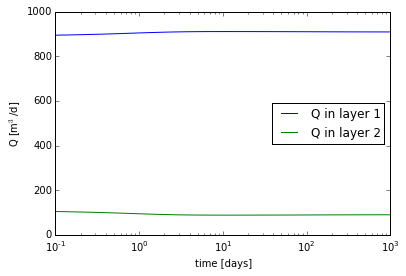

In [9]:
# Exercise 2f
Q = w.strength(t)
plt.semilogx(t, Q[0], label='Q in layer 1')
plt.semilogx(t, Q[1], label='Q in layer 2')
plt.legend(loc='best')
plt.ylabel('Q [m$^3$/d]')
plt.xlabel('time [days]')
plt.show()

In [11]:
print 16/176. * 1000
w.strength(100)

90.9090909091


array([[ 910.50120001],
       [  89.52974297]])

#### Exercise 2g
Don’t turn the well off at $t=100$ d, but add an injection well at $(x,y)=(50,0)$ in layer 1. The well radius is 0.2 m. Injection starts at $t=0$ and the injection pressure is such that the head is fixed at the well to $h=1$ m. Create a plot of the head vs. distance from the well 10 days after pumping started.

self.Neq  3
solution complete


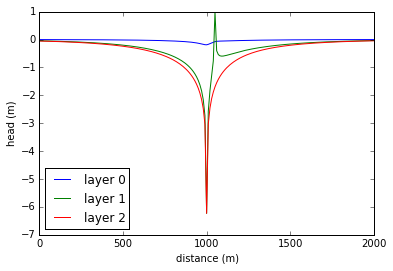

In [12]:
ml = ModelMaq(kaq=[1, 20, 2],
              z=[25, 20, 18, 10, 8, 0],
              c=[1000, 2000],
              Saq=[0.1, 1e-4, 1e-4],
              Sll=[0, 0],
              phreatictop=True,
              tmin=0.1,
              tmax=1000,
              M=20)
w1 = Well(ml, xw=0, yw=0, rw=0.2, tsandQ=[(0, 1000)], layers=[1, 2])
w2 = HeadWell(ml, xw=50, yw=0, rw=0.2, tsandh=[(0, 1)], layers=[1])
ml.solve()
xsection(ml, 
         x1=-1000, x2=1000, 
         y1=0, y2=0, 
         N=201,  # to hit the point x=50
         t=10,
         layers=[0,1,2]) 
plt.legend(['layer 0', 'layer 1', 'layer 2'], loc='best')
plt.xlabel('distance (m)')
plt.ylabel('head (m)');

#### Exercise 2h
Compute and plot the injection rate of the injection well vs time.

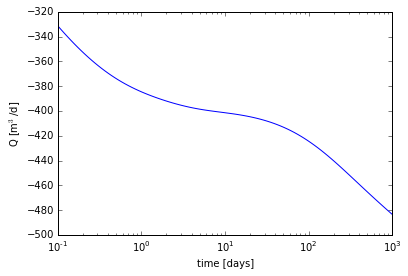

In [13]:
Q = w2.strength(t)
plt.semilogx(t, Q[0])
plt.ylabel('Q [m$^3$/d]')
plt.xlabel('time [days]');